<a href="https://colab.research.google.com/github/9more/Analysis/blob/main/Infront_Booking_Sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sys
path = 'https://docs.google.com/spreadsheets/d/1IeatEATayQCnj87LnPUJqc1shXO_tgtSRUKx5_aBcUs/edit?usp=sharing'
sheet_id = path.split('/d/')[1].split('/edit')[0]
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'
data = pd.read_csv(csv_url, skiprows=1)

In [2]:
def get_df(df):
  today=pd.to_datetime('today').strftime('%Y-%m-%d')
  df.columns=df.columns.str.lower().str.strip()
  if 'competition' in df.columns:
      df.set_index('competition', inplace=True)
  df = df[['date','start gmt', 'home', 'away','srt / rtmp url','igame channel','ingest method', 'sport']]
  df.sort_values(by=['start gmt'], inplace=True)
  df['date'] = pd.to_datetime(df['date'], format='mixed')
  df1= df[df['date']==today]
  df.to_csv(f'Booking Sheet for {today}')
  return df1

def graphs(df, i, j='barh',t=None):
  Title=input('Enter Chart Title ')
  color=input('Enter Chart Color ')
  if i == 'competition':
    df.sort_values(by=['start gmt'], inplace=True)
    df.index.value_counts().plot(kind=j, color=color, figsize=(10,5), title=Title, fontsize=12)
  else:
    df[i].value_counts().plot(kind=j, color=color, figsize=(10,5), title=Title, fontsize=12)

In [6]:
get_df(data)

,date,start gmt,home,away,srt / rtmp url,igame channel,ingest method,sport
competition,,,,,,,,
UEFA Football Europa League,2025-07-31,17:00,BK Hacken (SWE),RSC Anderlecht (BEL),Pending details from XVI,NaN,SRT,Football (ET & Pens)
UEFA Football Conference League,2025-07-31,18:00,FC Prishtina (KOS),Larne FC (NIR),Pending details from XVI,INF_XVI_CH86,SRT,Football (ET & Pens)
UEFA Football Conference League,2025-07-31,18:00,KA Akureyri (ISL),Silkeborg IF (DEN),Pending details from XVI,INF_XVI_CH85,SRT,Football (ET & Pens)


Enter Chart Title a
Enter Chart Color b


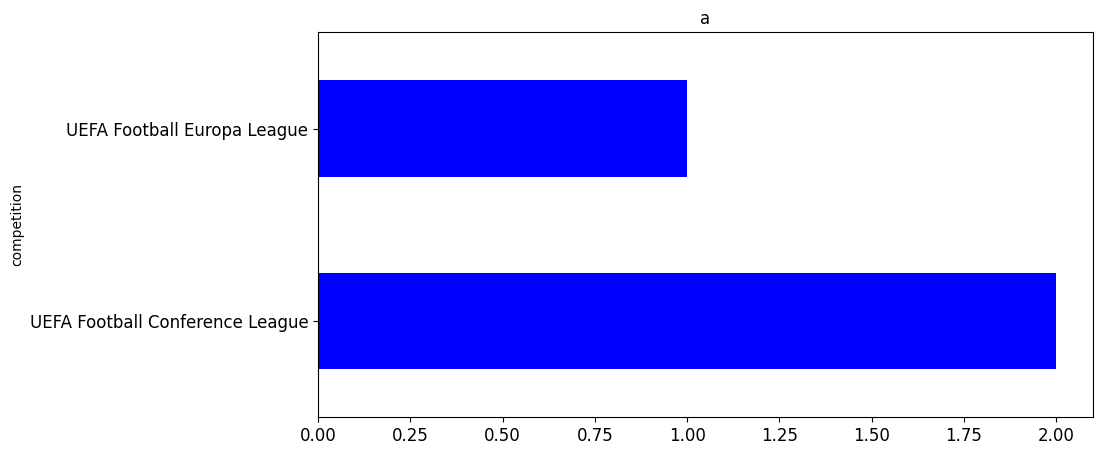

In [4]:
graphs(get_df(data),'competition')

In [ ]:
df=pd.read_excel('/content/sample_df/Infront Bookings.xlsx',skiprows=1, sheet_name='July 25')
today=pd.to_datetime('today').strftime('%Y-%m-%d')
df.columns=df.columns.str.lower().str.strip()
df.columns
df.set_index('competition', inplace=True)
df = df[['date','start gmt', 'home', 'away','srt / rtmp url','igame channel','ingest method', 'sport']]
pd.to_datetime(df['date'])
df1= df[df['date']==today]
df1.sort_values(by=['start gmt'], inplace=True)
df1.index.value_counts().plot(kind='barh', color='red', figsize=(10,5), title='Today\'s Games', fontsize=12)